In [25]:
import xgcm
import xmitgcm
import xrft
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
from dask.utils import SerializableLock
from dask.distributed import Client
client = Client('129.236.21.48:8786')
client

<Client: scheduler='tcp://129.236.21.48:8786' processes=1 cores=32>

In [3]:
ddir = '/swot/SUM03/channel_moc/GCM/run'
iters = list(range(2073840,2418960,480))
ds = xmitgcm.open_mdsdataset(ddir, prefix=['Diag_ThPhUVW'], iters=iters)
ds

/home/rpa/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:              (XC: 200, XG: 200, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 719)
Coordinates:
    iter                 (time) int64 2073840 2074320 2074800 2075280 ...
  * time                 (time) int64 2073840 2074320 2074800 2075280 ...
  * XG                   (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 ...
  * XC                   (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 ...
  * YG                   (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 ...
  * YC                   (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 ...
  * Zp1                  (Zp1) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 ...
  * Z                    (Z) float32 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 ...
  * Zu                   (Zu) float32 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zl                   (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 ...
    rA                   (Y

In [16]:
ds.WVEL.nbytes / 1e9

9.2032

In [25]:
w_sq_profile = ds.WVEL.mean(dim=('time', 'YC', 'XC'))
w_sq_profile

<xarray.DataArray 'WVEL' (Zl: 40)>
dask.array<mean_ag..., shape=(40,), dtype=float32, chunksize=(40,)>
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...

In [26]:
%time w_sq_profile.load()

CPU times: user 574 ms, sys: 45.6 ms, total: 620 ms
Wall time: 25.7 s


<xarray.DataArray 'WVEL' (Zl: 40)>
array([ -5.607259e-18,  -6.152687e-16,  -3.416361e-15,   2.752518e-15,
         3.562082e-16,  -2.898239e-15,   1.003860e-15,   1.084816e-15,
        -3.509461e-15,   2.023910e-15,  -2.396310e-15,  -9.208792e-15,
         8.091593e-15,  -9.459757e-15,  -5.909818e-15,  -2.287019e-16,
        -3.966864e-15,   1.914619e-15,  -1.188035e-15,  -3.863645e-15,
        -1.576626e-15,  -1.329709e-15,   1.981408e-15,  -5.794455e-15,
        -4.436411e-15,  -3.539819e-15,  -1.052433e-16,   3.400169e-15,
        -7.763720e-15,  -2.412501e-15,  -2.378095e-15,   4.250212e-17,
        -4.661066e-15,   5.990774e-16,   4.250212e-16,   4.082227e-15,
         6.172927e-17,   2.152429e-15,  -2.580486e-15,  -2.596677e-15], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...

In [70]:
#v_fft = xrft.dft(ds.VVEL, dim=['XC'], shift=False)
v_fft = xrft.dft(ds.VVEL[::4,0], dim=['XC'], shift=False)
pow_spec = (v_fft*v_fft.conj()).isel(freq_XC=slice(0,len(ds.XC)//2)).mean(dim=('YG','time')).astype('f8')
pow_spec

/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: pandas.core.common.is_timedelta64_dtype is deprecated. import from the public API: pandas.api.types.is_timedelta64_dtype instead
  from ipykernel import kernelapp as app


<xarray.DataArray 'fft-f81560613af5a4482611b7ccd03da6e7' (freq_XC: 100)>
dask.array<astype-..., shape=(100,), dtype=float64, chunksize=(100,)>
Coordinates:
  * freq_XC          (freq_XC) float64 0.0 1e-06 2e-06 3e-06 4e-06 5e-06 ...
    freq_XC_spacing  float64 1e-06

In [71]:
pow_spec.load()

<xarray.DataArray 'fft-f81560613af5a4482611b7ccd03da6e7' (freq_XC: 100)>
array([  3.712837e-13,   2.027773e+01,   1.001360e+02,   1.906462e+02,
         1.776942e+02,   1.333660e+02,   9.993586e+01,   7.099582e+01,
         5.477914e+01,   4.022300e+01,   3.090806e+01,   2.419133e+01,
         1.904378e+01,   1.558797e+01,   1.235109e+01,   1.020528e+01,
         8.542997e+00,   7.107294e+00,   6.094673e+00,   5.150033e+00,
         4.465075e+00,   3.844501e+00,   3.317746e+00,   2.903649e+00,
         2.522106e+00,   2.244634e+00,   2.014233e+00,   1.758989e+00,
         1.560076e+00,   1.414001e+00,   1.253286e+00,   1.113787e+00,
         9.968556e-01,   9.103171e-01,   8.152889e-01,   7.359249e-01,
         6.576561e-01,   6.058506e-01,   5.387253e-01,   4.825169e-01,
         4.364177e-01,   3.922862e-01,   3.591411e-01,   3.228397e-01,
         2.980982e-01,   2.701289e-01,   2.459009e-01,   2.224000e-01,
         2.016662e-01,   1.861596e-01,   1.696363e-01,   1.544698e-01,
    

(0.01, 500.0)

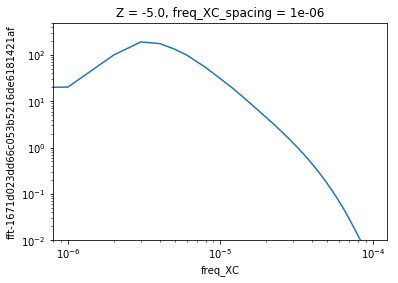

In [54]:
fig, ax = plt.subplots()
pow_spec[0].plot(ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-2,5e2])

In [72]:
from dask.dot import dot_graph

RuntimeError: Drawing dask graphs requires the `graphviz` python library and the `graphviz` system library to be installed.